Student Performance Indicator
Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model


1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- **gender**: Sex of students → *(Male/Female)*  
- **race/ethnicity**: Ethnicity of students → *(Group A, B, C, D, E)*  
- **parental level of education**: Parents' final education → *(Bachelor's degree, some college, master's degree, associate's degree, high school)*  
- **lunch**: Having lunch before the test → *(Standard or free/reduced)*  
- **test preparation course**: Complete or not complete before the test  
- **math score**  
- **reading score**  
- **writing score**


### 3. DATA Checks to Perform

- **Check Missing Values**  
- **Check Duplicates**  
- **Check Data Types**  
- **Check the Number of Unique Values in Each Column**  
- **Check Statistics of the Dataset**  
- **Check Various Categories Present in Different Categorical Columns**


3.1 Check missing Values


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values int he data set


3.2 Check Duplicates 

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values int he data set


3.3 Check data types

In [7]:
#check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Insight
-  **From above description of numerical data, all means are very close to each other - between 66 and 68.05;**
-   **All standard deviations are also close - between 14.6 and 15.19;**
-  **While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17**

3.7 Exploring Data

In [10]:
# List of categorical columns
categorical_columns = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course']

# Loop to display unique categories in each column
for column in categorical_columns:
    print(f"Categories in '{column}' variable:", end=" ")
    print(df[column].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [11]:
# Dictionary to store feature types
feature_types = {'Numerical Features': [], 'Categorical Features': []}

# Loop to classify columns based on data type
for feature in df.columns:
    if df[feature].dtype == 'O':  # 'O' indicates object (categorical)
        feature_types['Categorical Features'].append(feature)
    else:
        feature_types['Numerical Features'].append(feature)

# Display the results
for feature_type, features in feature_types.items():
    print(f'We have {len(features)} {feature_type.lower()} : {features}')


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.8 Adding columns for "total score" and "average"



In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
# List of subjects and corresponding columns
subjects = ['math_score', 'writing_score', 'reading_score']
full_marks_count = {}

# Loop to calculate the number of students with full marks in each subject
for subject in subjects:
    full_marks_count[subject] = df[df[subject] == 100].shape[0]

# Print the results
for subject, count in full_marks_count.items():
    print(f'Number of students with full marks in {subject.replace("_score", "").capitalize()}: {count}')


Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
# List of subjects and corresponding columns
subjects = ['math_score', 'writing_score', 'reading_score']
less_than_20_count = {}

# Loop to calculate the number of students with less than 20 marks in each subject
for subject in subjects:
    less_than_20_count[subject] = df[df[subject] <= 20].shape[0]

# Print the results
for subject, count in less_than_20_count.items():
    print(f'Number of students with less than 20 marks in {subject.replace("_score", "").capitalize()}: {count}')


Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
-  **From above values we get students have performed the worst in Maths**
-  **Best performance is in reading section**

4.Exploring Data(Visualization)

4.1 Visualize average score distribution to make some conclusion
-  **Histogram**
- **Kernel Distribution Function(KDE)

4.1.1 Histogram & KDE

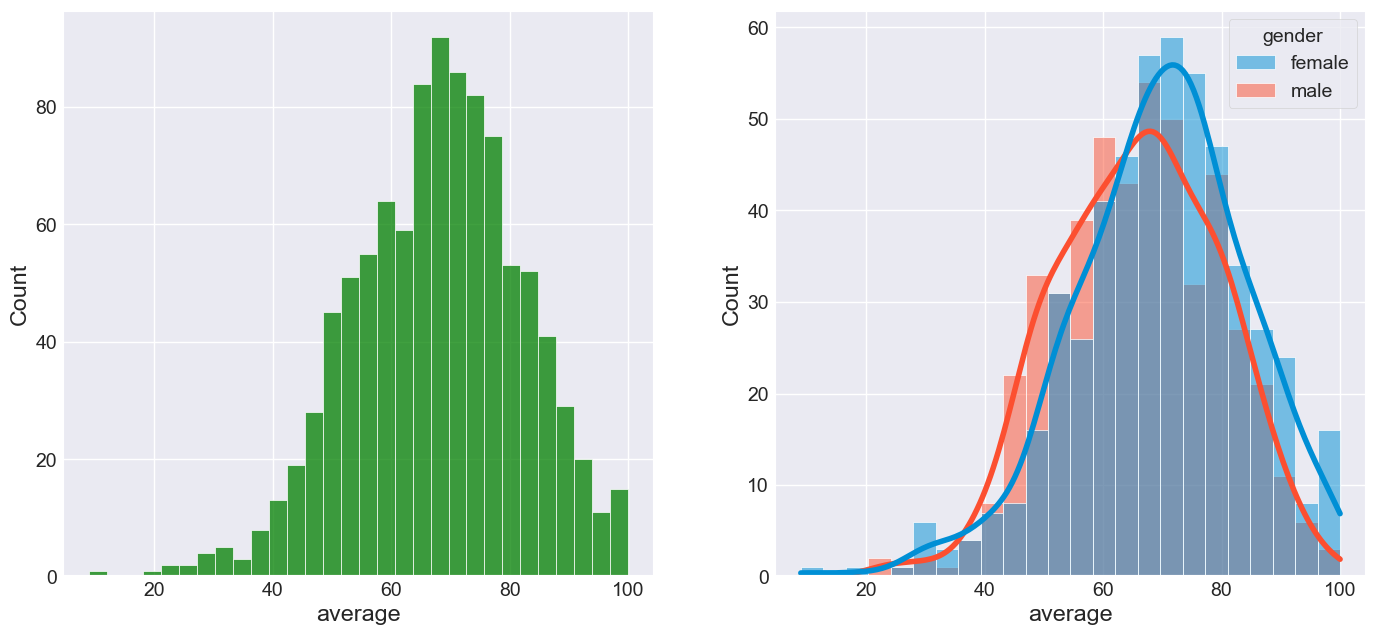

In [39]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=False,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

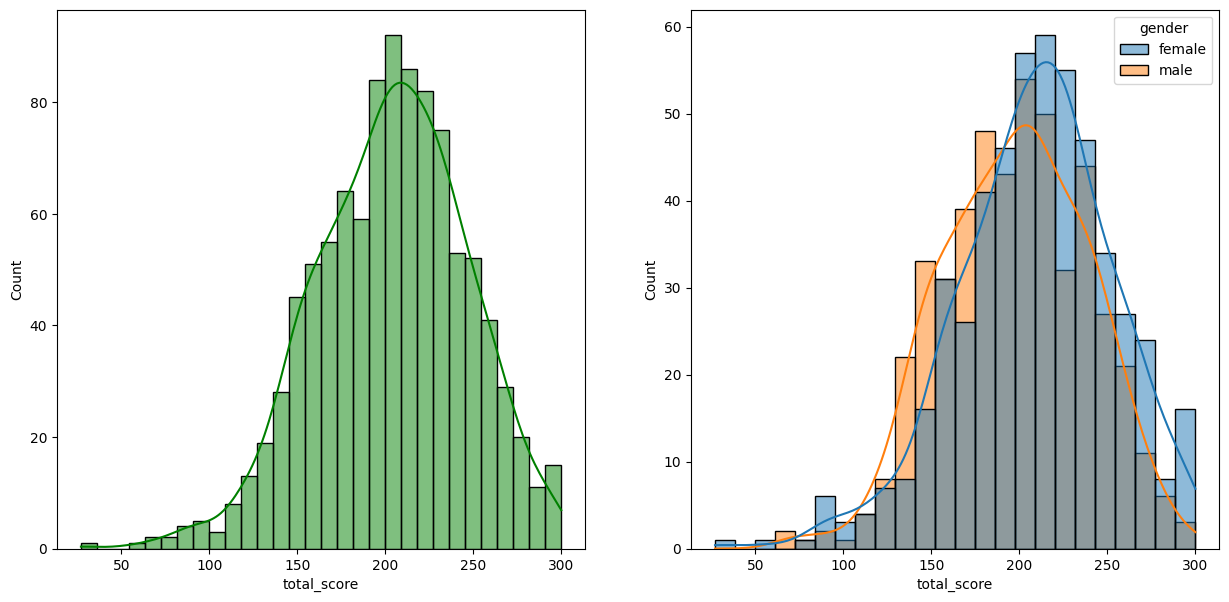

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot (total_score distribution with kde)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])

# Second plot (total_score distribution with kde and hue)
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])

plt.show()



Insights
-  **Female students tend to perform well then male students.**

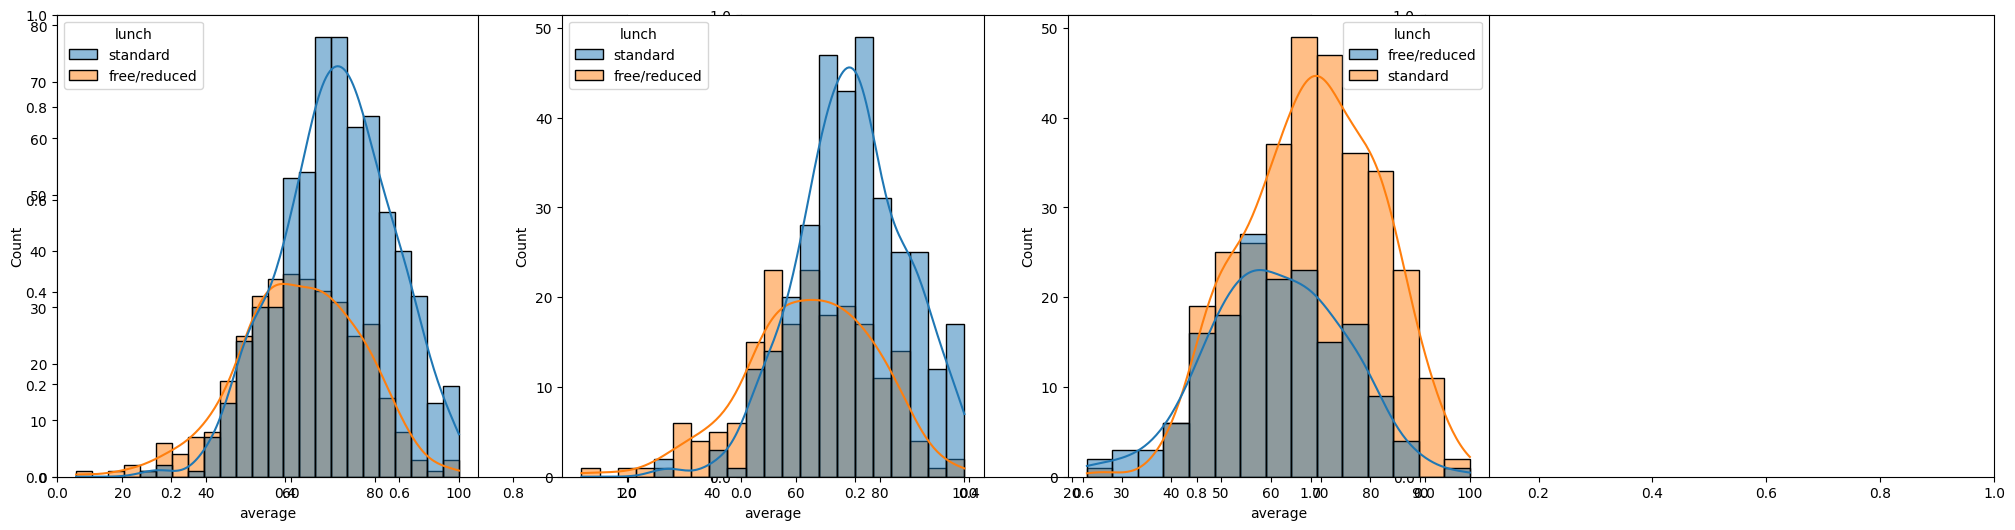

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


Insights
-  **Standard lunch helps perform well in exams.**
-  **Standard lunch helps perform well in exams be it a male or a female.**

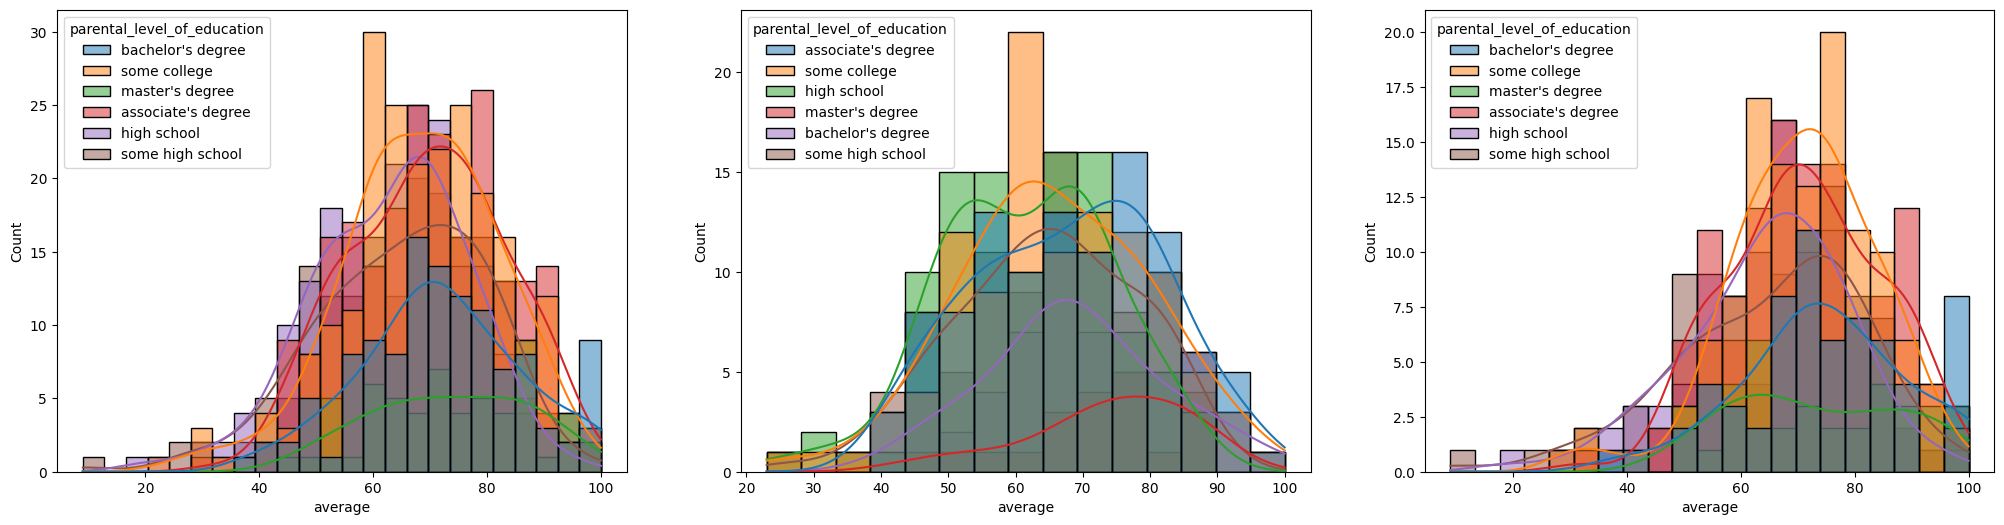

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (all students)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])

# Second subplot (male students)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])

# Third subplot (female students)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])

# Show the plots
plt.show()



Insights
-  **In general parent's education don't help student perform well in exam.**
-  **2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam**
-  **3rd plot we can see there is no effect of parent's education on female students**

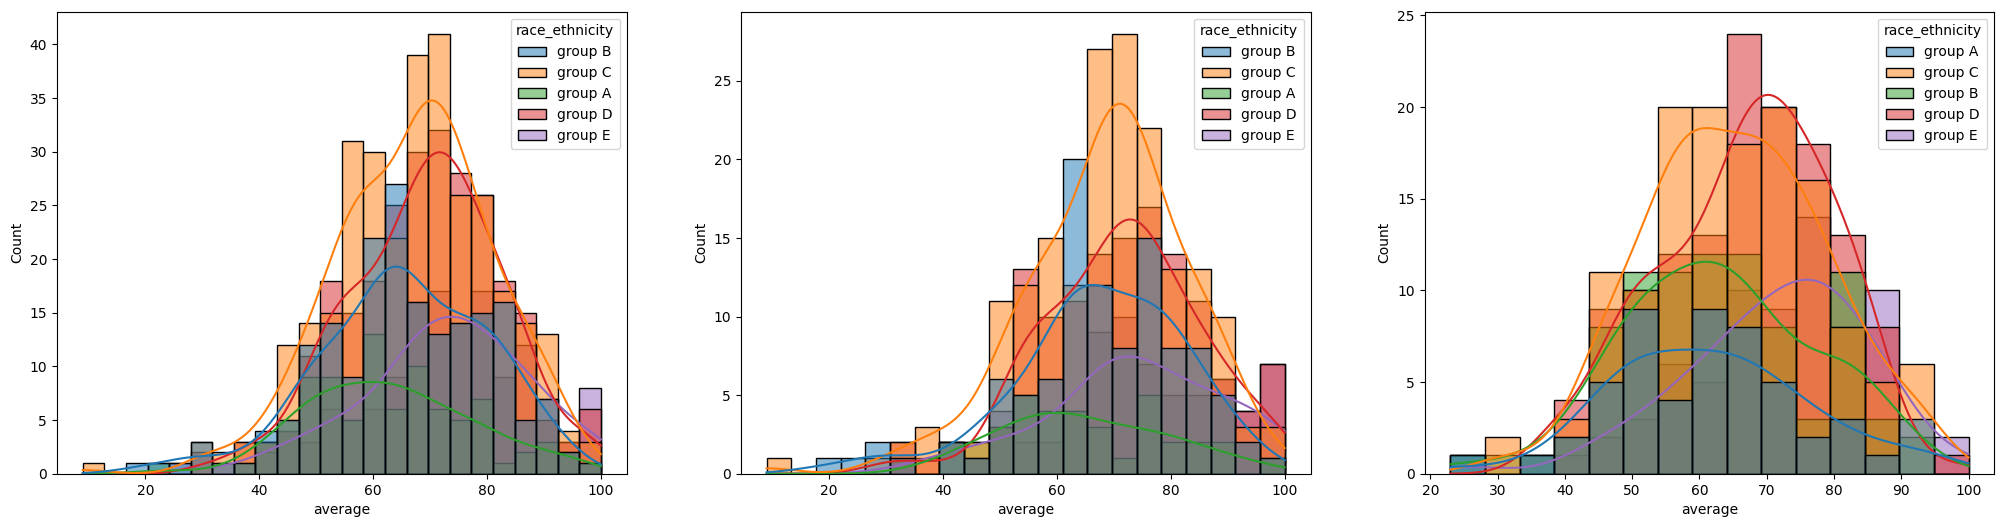

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the figure with 1 row and 3 columns of subplots
plt.subplots(1, 3, figsize=(25, 6))

# First subplot: All students
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

# Second subplot: Female students
plt.subplot(132)
ax = sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity')

# Third subplot: Male students
plt.subplot(133)
ax = sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity')

# Show the plots
plt.show()



Insights
-  **Students of group A and group B tends to perform poorly in exam.**
-  **Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female**

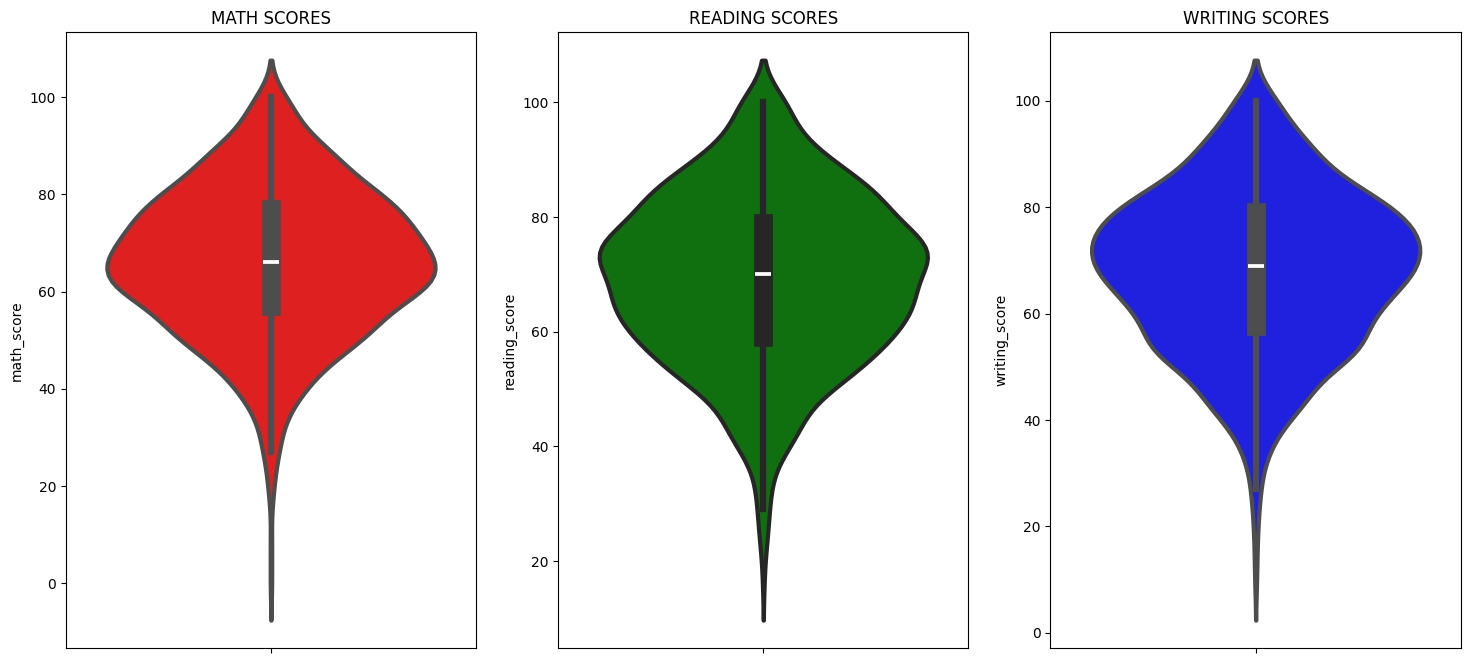

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a 1-row, 3-column subplot grid
plt.figure(figsize=(18, 8))

# First subplot: Math scores
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Second subplot: Reading scores
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Third subplot: Writing scores
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

# Display the plots
plt.show()


Insights
-  **From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80**

4.2 Maximum score of studets in three subjects

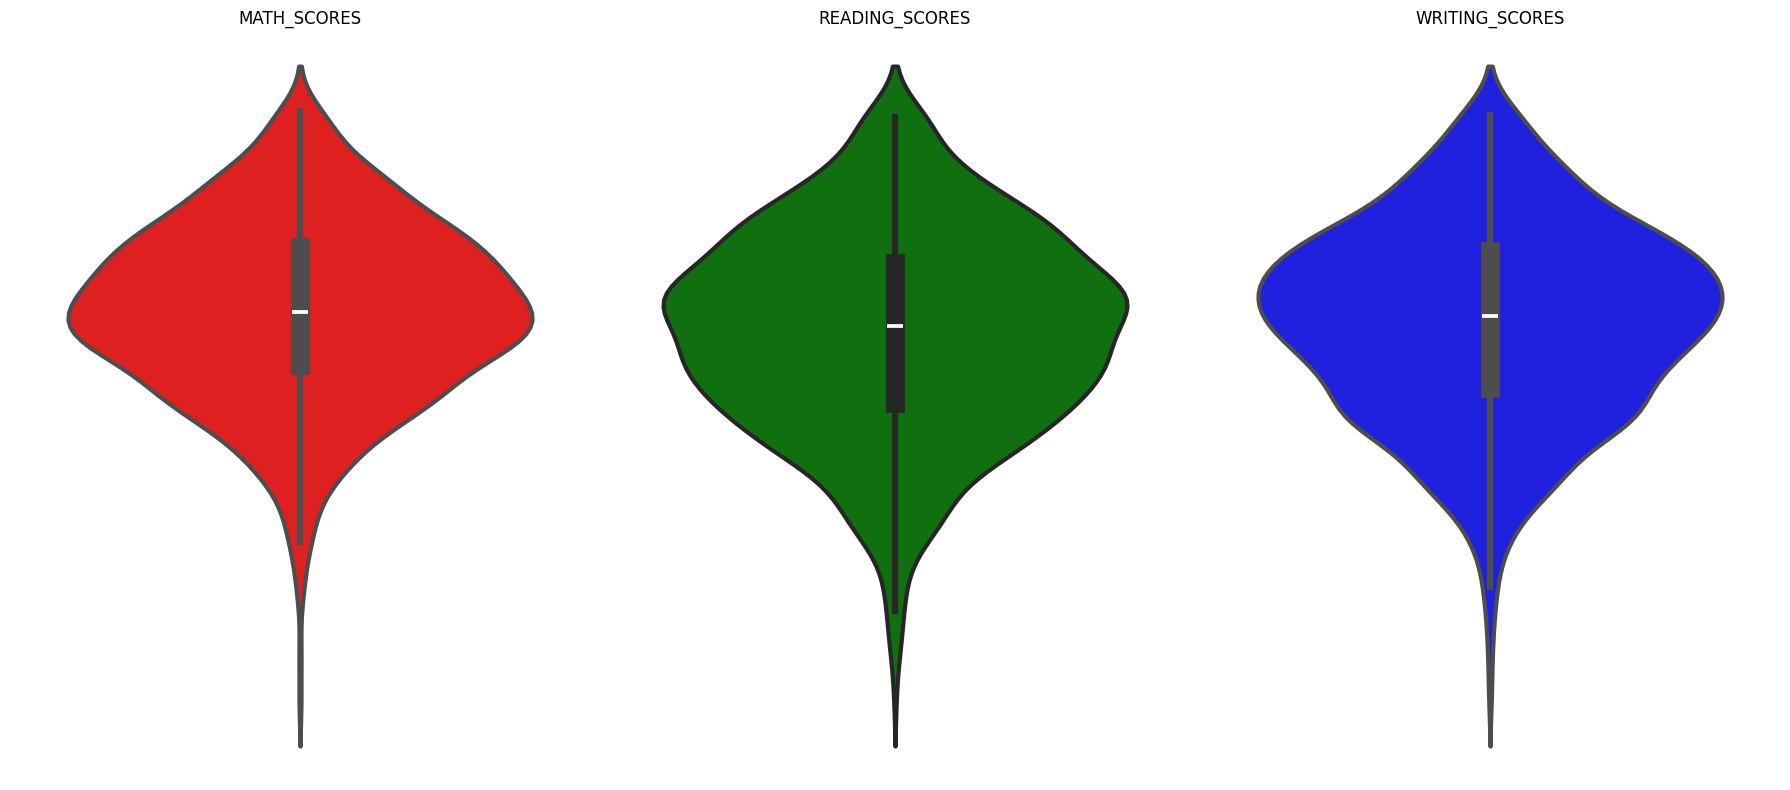

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the scores and their respective colors
scores = [
    ('math_score', 'red', 'MATH_SCORES'),
    ('reading_score', 'green', 'READING_SCORES'),
    ('writing_score', 'blue', 'WRITING_SCORES')
]

# Set the overall figure size
plt.figure(figsize=(18, 8))

# Loop through each score to create subplots
for i, (score, color, title) in enumerate(scores, 1):
    plt.subplot(1, 3, i)
    plt.title(title)
    sns.violinplot(y=score, data=df, color=color, linewidth=3)
    plt.axis('off')# to delete th empty graph
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


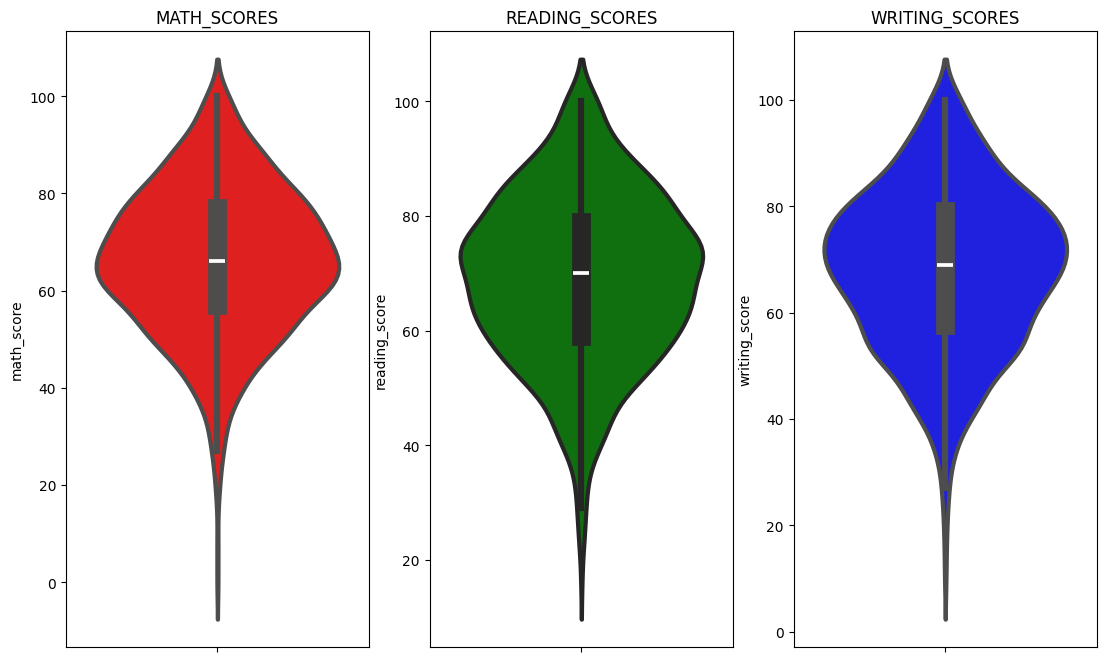

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH_SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING_SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING_SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
-  **From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80**

4.3 Multivariate analysis using pipelot

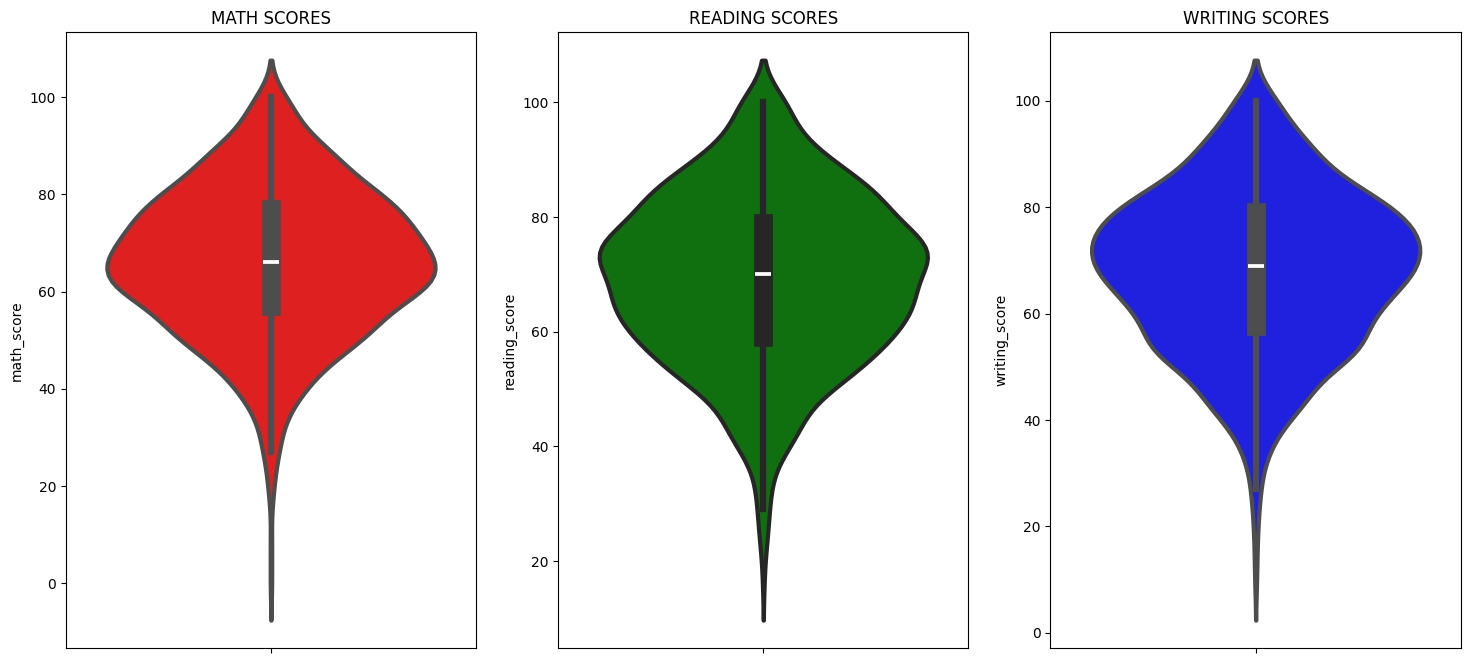

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a 1-row, 3-column subplot grid
plt.figure(figsize=(18, 8))

# First subplot: Math scores
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Second subplot: Reading scores
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Third subplot: Writing scores
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

# Display the plots
plt.show()


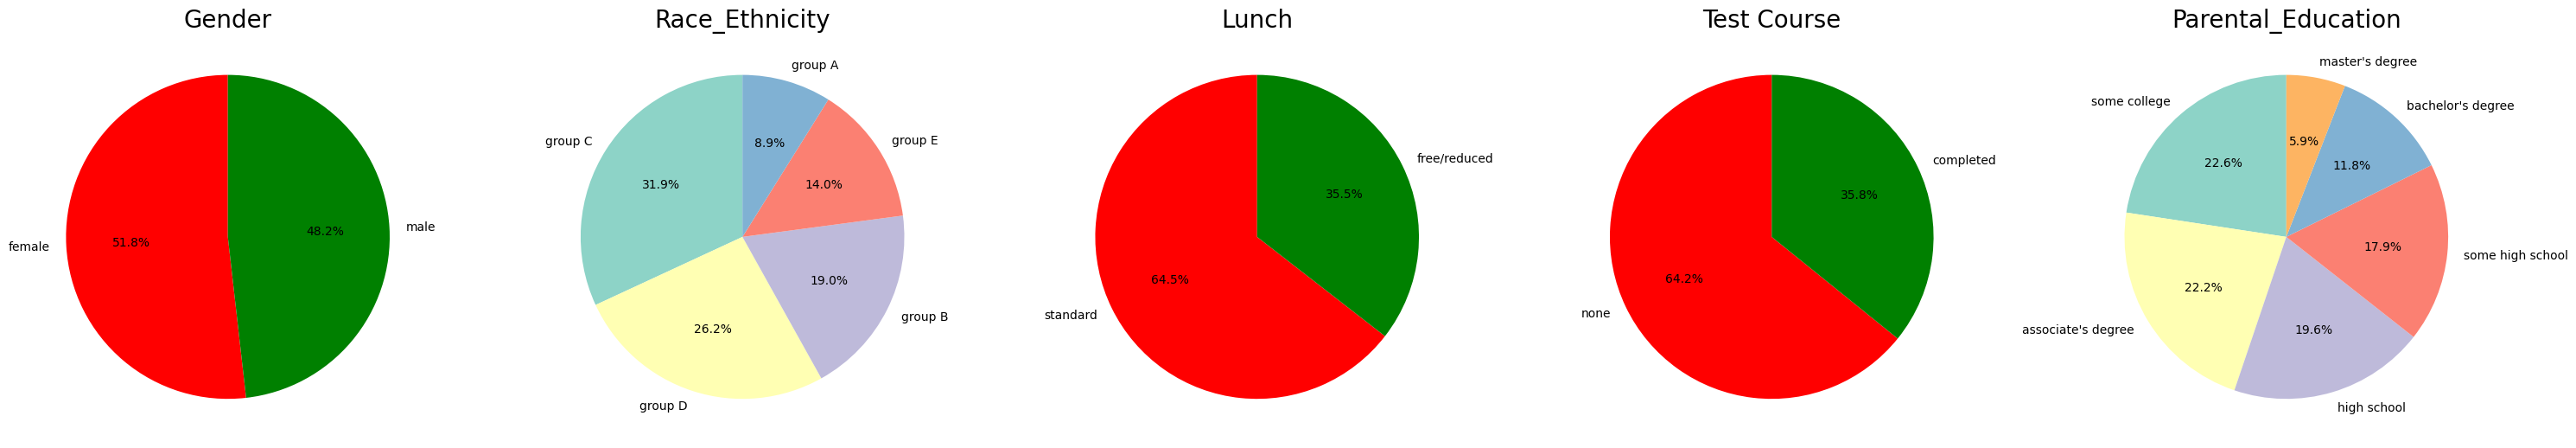

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

# Subplot 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index  # Automatically fetch unique labels
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender', fontsize=20)
plt.axis('off')

# Subplot 2: Race_Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
colors = plt.cm.Set3.colors[:len(labels)]
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Race_Ethnicity', fontsize=20)
plt.axis('off')

# Subplot 3: Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Subplot 4: Test_Preparation_Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Subplot 5: Parental_Level_of_Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = plt.cm.Set3.colors[:len(labels)]
plt.pie(size, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Parental_Education', fontsize=20)
plt.axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


loop the above code

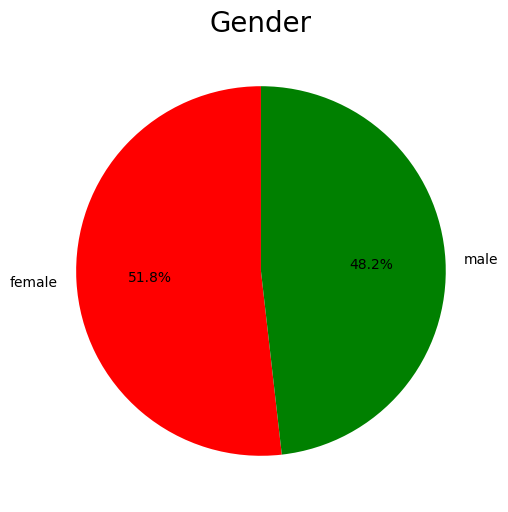

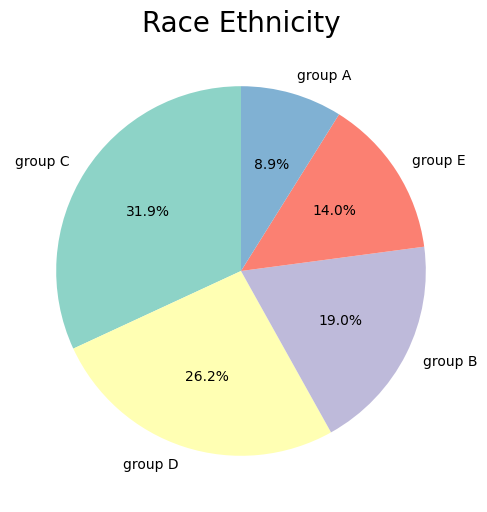

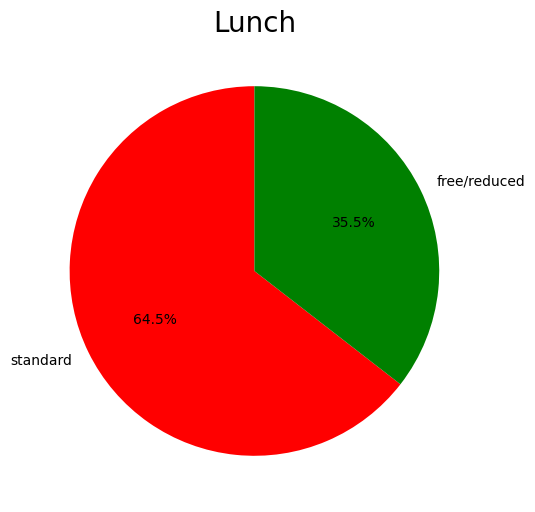

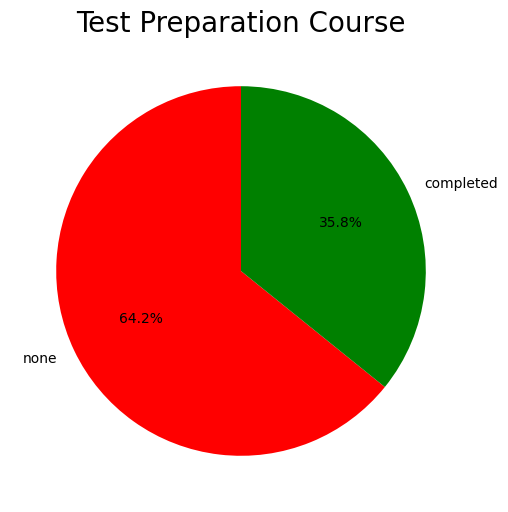

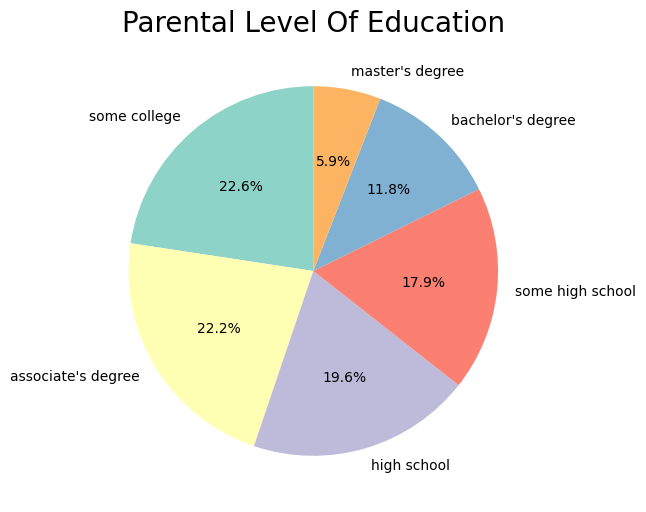

In [26]:
import matplotlib.pyplot as plt

# Define the columns to plot and their specific colors
columns = [
    ('gender', ['red', 'green']),
    ('race_ethnicity', plt.cm.Set3.colors),
    ('lunch', ['red', 'green']),
    ('test_preparation_course', ['red', 'green']),
    ('parental_level_of_education', plt.cm.Set3.colors)
]

# Set the overall figure size
plt.rcParams['figure.figsize'] = (30, 12)

# Loop through each column to create subplots
for i, (column, colors) in enumerate(columns, 1):
    plt.figure(figsize=(6, 6))  # Create a separate figure for each chart
    size = df[column].value_counts()
    labels = size.index
    
    # Adjust color length to match number of unique labels
    color_selection = colors[:len(labels)] if len(colors) > len(labels) else colors
    
    plt.pie(size, colors=color_selection, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(column.replace('_', ' ').title(), fontsize=20)
    plt.axis('off')

# Show all the plots
plt.show()



Insights
-  **Number of Male and Female students is almost equal**
-  **Number students are greatest in Group C**
-  **Number of students who have standard lunch are greater**
- **Number of students who have not enrolled in any test preparation course is greater**
-  **Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"**

4.4 Feature wise visualization

4.4.1 Gender column
-  **How is distribution of gender**
-  **Is gender has any impact on student's Performance**



Univariate Analysis(how is distribution of Gender?)

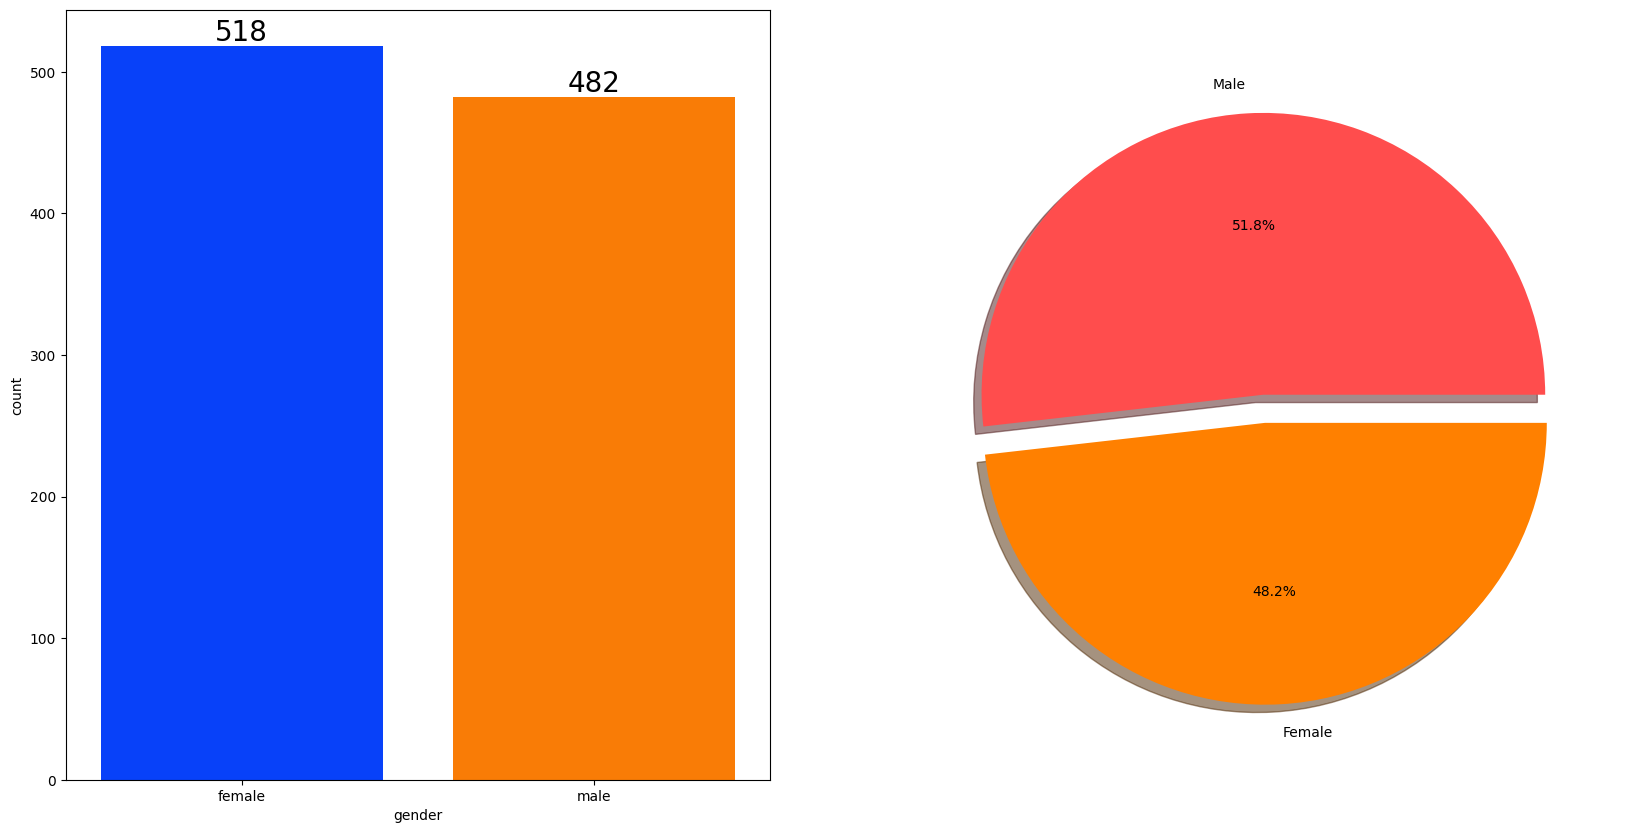

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

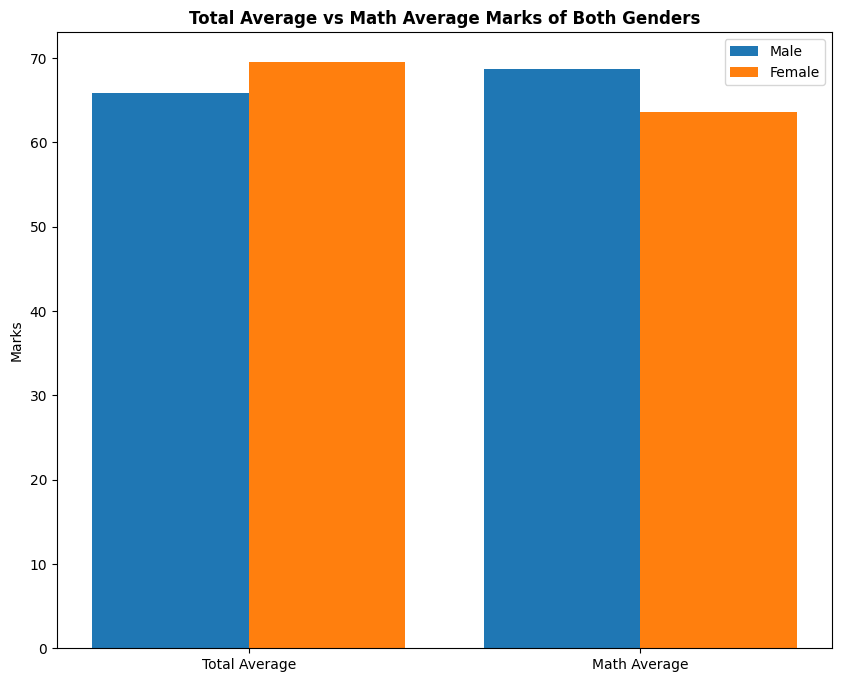

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['number']).columns

# Perform groupby and mean on the numeric columns
gender_group = df.groupby('gender')[numeric_columns].mean()

# Proceed with the plotting code
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()
plt.show()


Insights
-  On an average females have a better overall score than men.
-  whereas males have scored higher in Maths.


4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

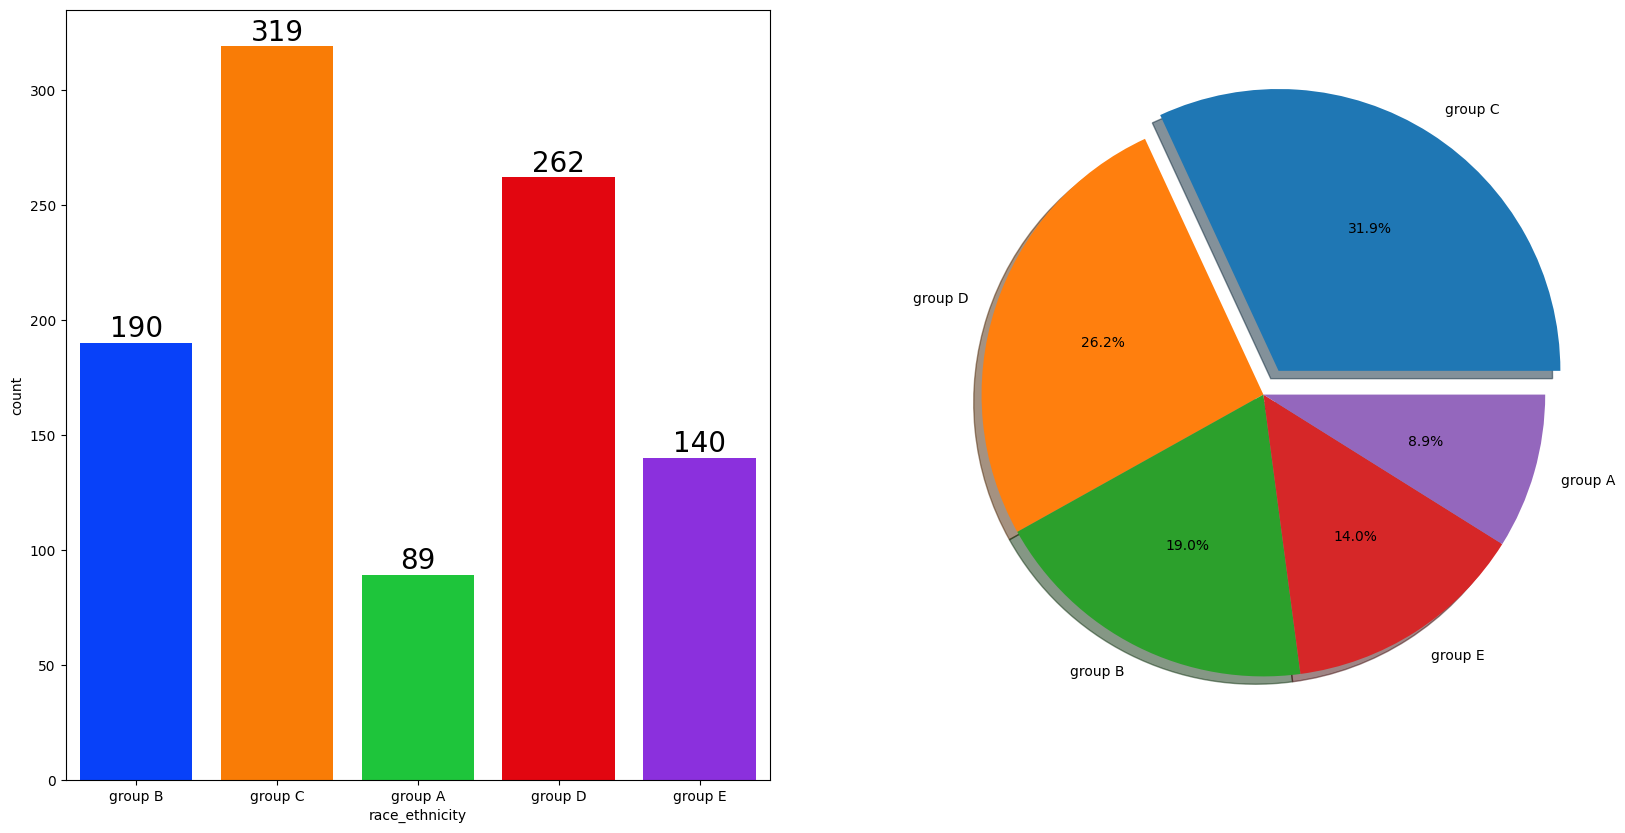

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot for race/ethnicity count
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart for race/ethnicity distribution
ax[1].pie(
    x=df['race_ethnicity'].value_counts(), 
    labels=df['race_ethnicity'].value_counts().index, 
    explode=[0.1, 0, 0, 0, 0], 
    autopct='%1.1f%%', 
    shadow=True
)

# Show the plots
plt.show()


Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

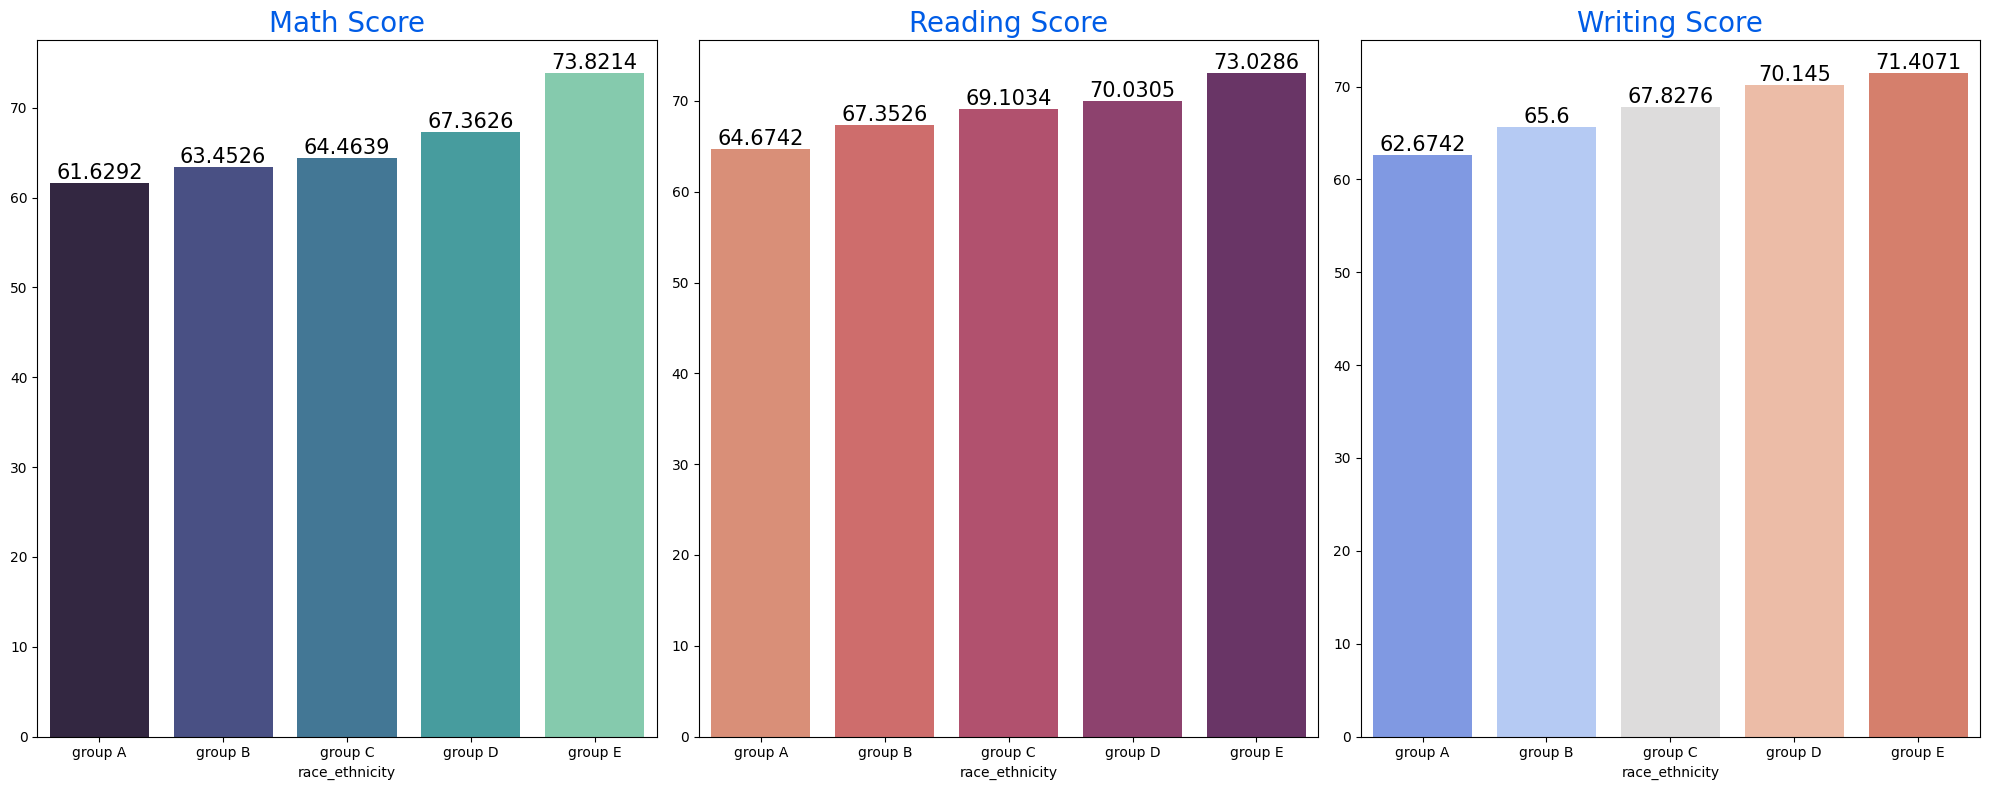

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by race_ethnicity
Group_data2 = df.groupby('race_ethnicity')

# Create a figure with three subplots
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score Bar Plot
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

# Add labels to bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score Bar Plot
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

# Add labels to bars
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score Bar Plot
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

# Add labels to bars
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Show the plots
plt.tight_layout()
plt.show()


Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?
 
 
 UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

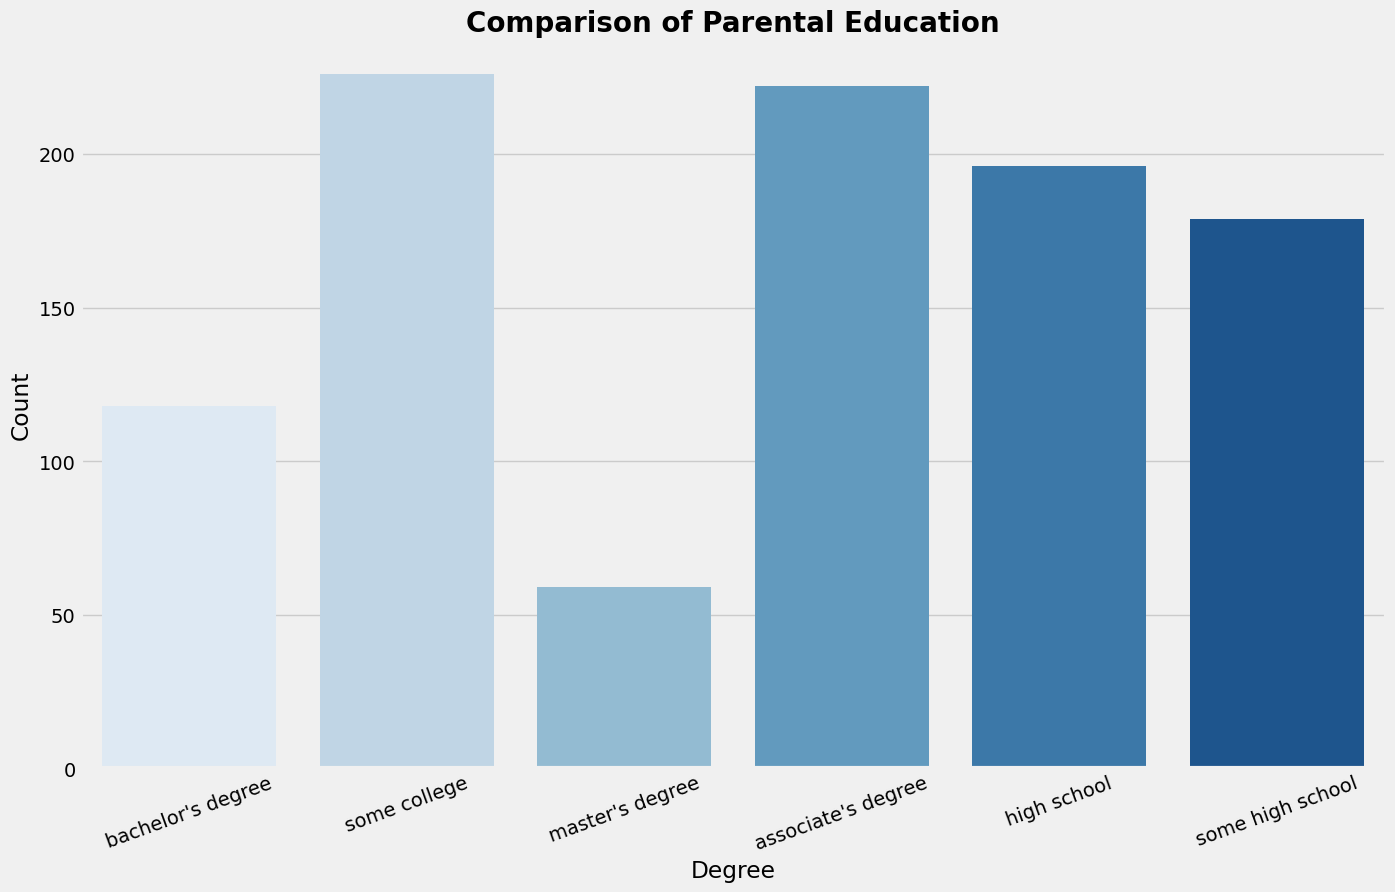

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Correct column name
sns.countplot(x=df['parental_level_of_education'], palette='Blues')

# Set title and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=20)  # Rotate labels for better readability
plt.show()


In [32]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

Insights
- Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

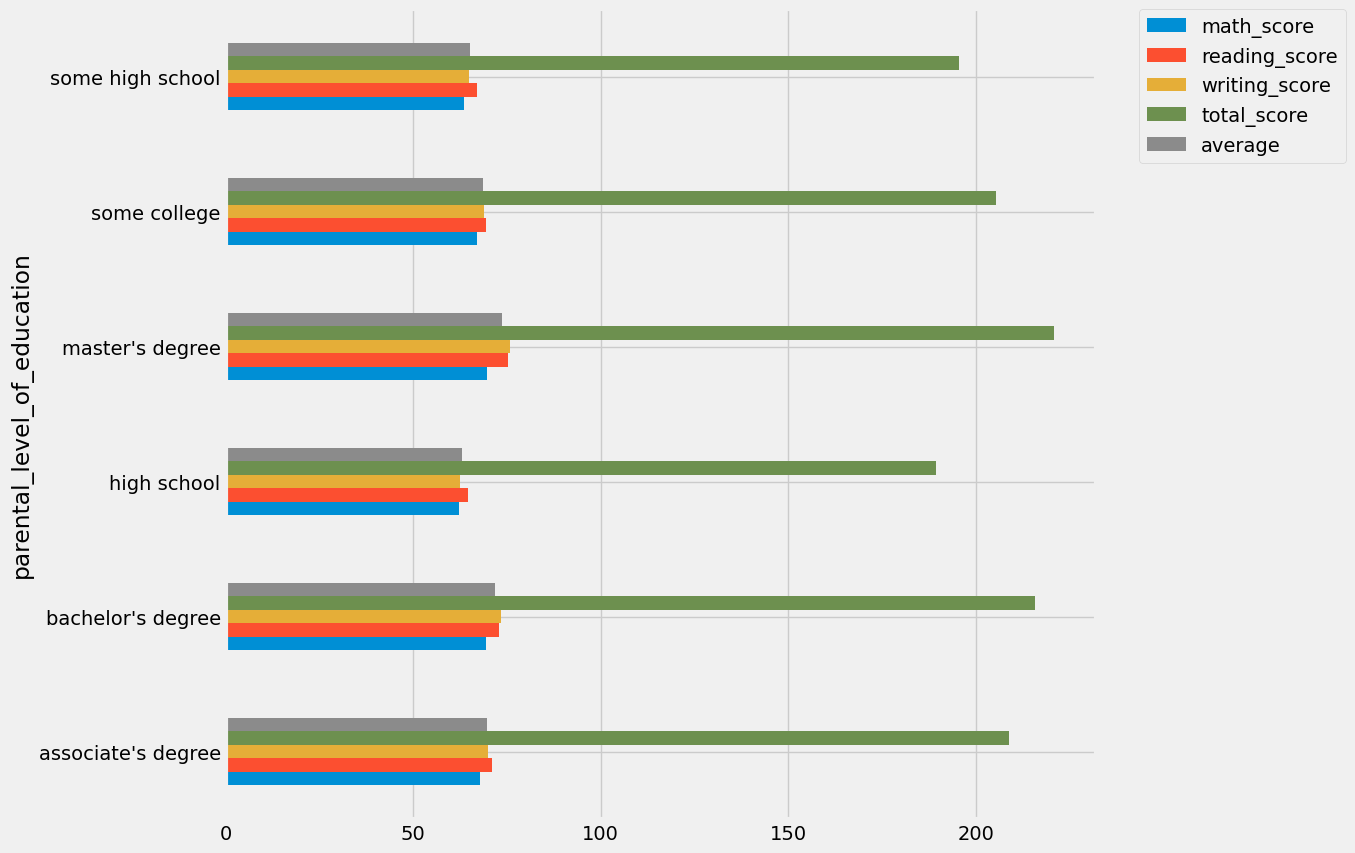

In [33]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure you're selecting only numerical columns for aggregation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Group by 'parental level of education' and calculate the mean for numerical columns only
df.groupby('parental_level_of_education')[numerical_cols].agg('mean').plot(kind='barh', figsize=(10, 10))

# Adjusting the legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


Insights
- The score of student whose parents possess master and bachelor level education are higher than others.


4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

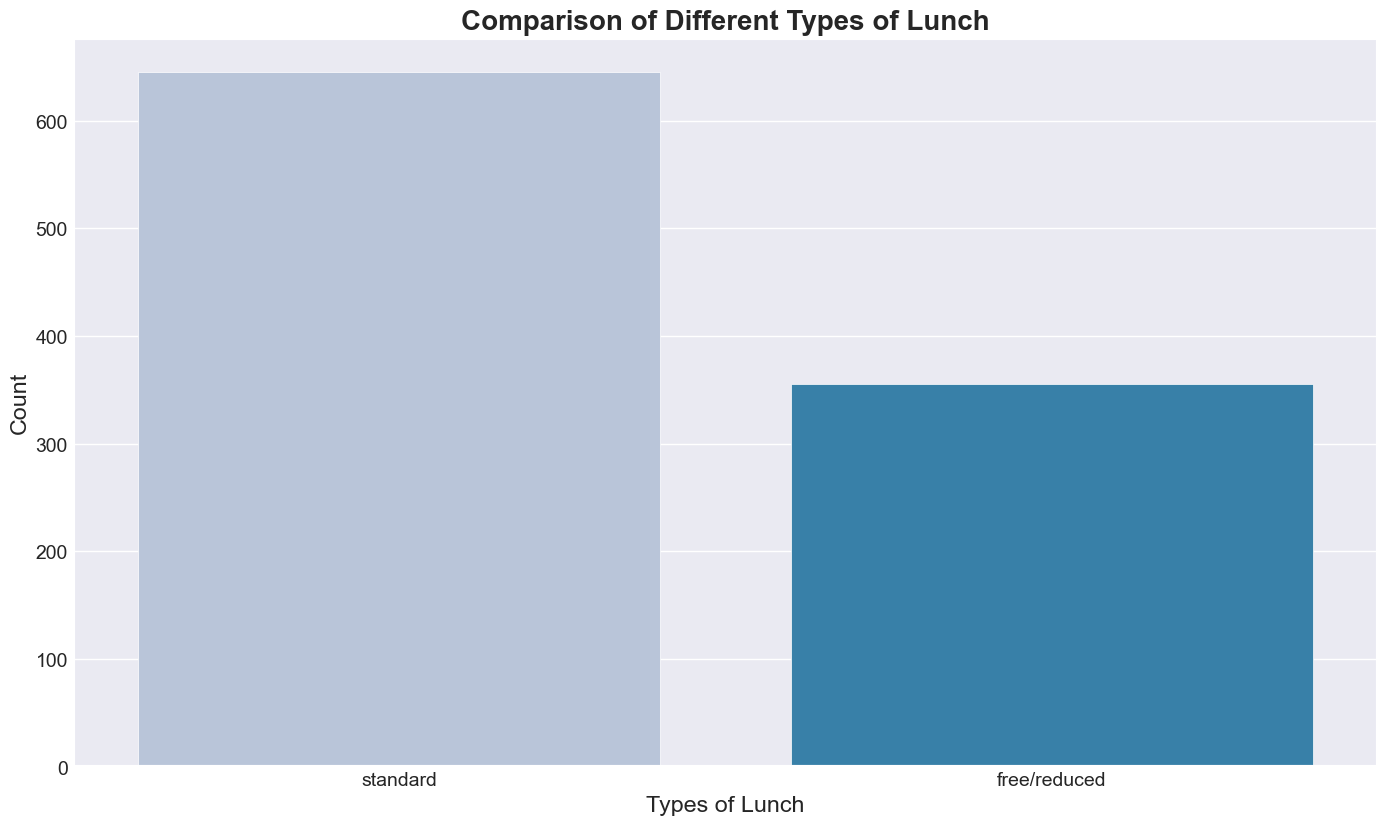

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and Seaborn style
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style('darkgrid')  # Use a valid Seaborn style like 'darkgrid' or 'whitegrid'

# Create the countplot
sns.countplot(x=df['lunch'], palette='PuBu')

# Set title and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Show the plot
plt.show()


Insights
- Students being served Standard lunch was more than free lunch


BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

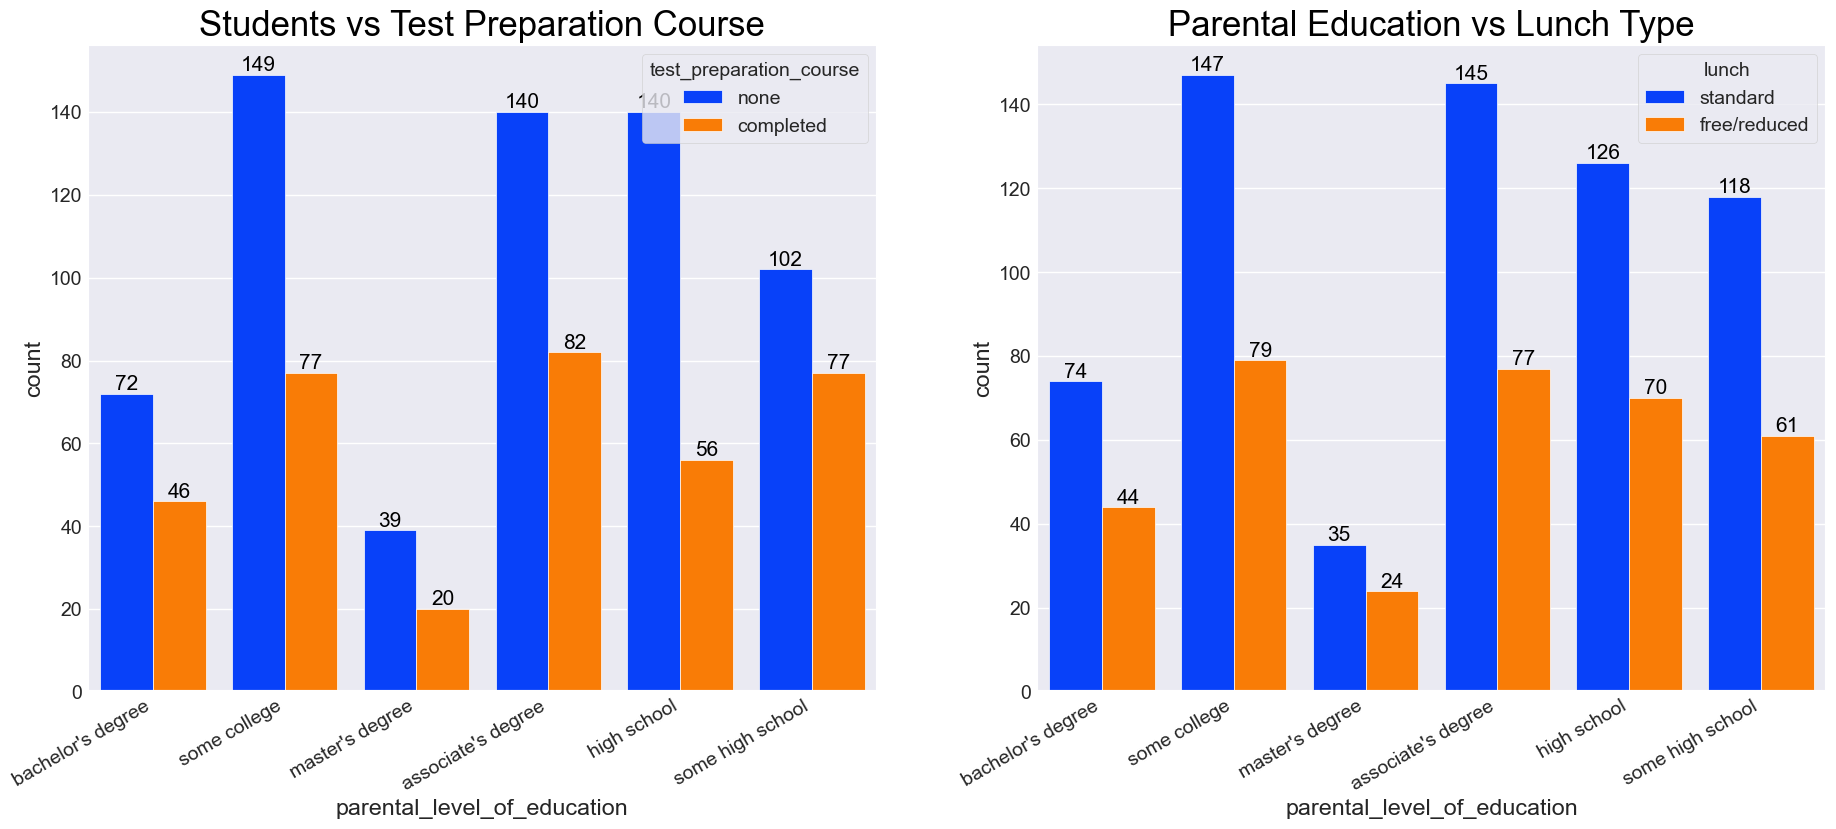

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First countplot: Parental level of education vs Test Preparation Course
sns.countplot(x='parental_level_of_education', hue='test_preparation_course', data=df, palette='bright', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Adding bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Second countplot: Parental level of education vs Lunch
sns.countplot(x='parental_level_of_education', hue='lunch', data=df, palette='bright', saturation=0.95, ax=ax[1])
ax[1].set_title('Parental Education vs Lunch Type', color='black', size=25)

# Adding bar labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Rotate x-axis labels for better readability
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=30, ha='right')

plt.show()


Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?


BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

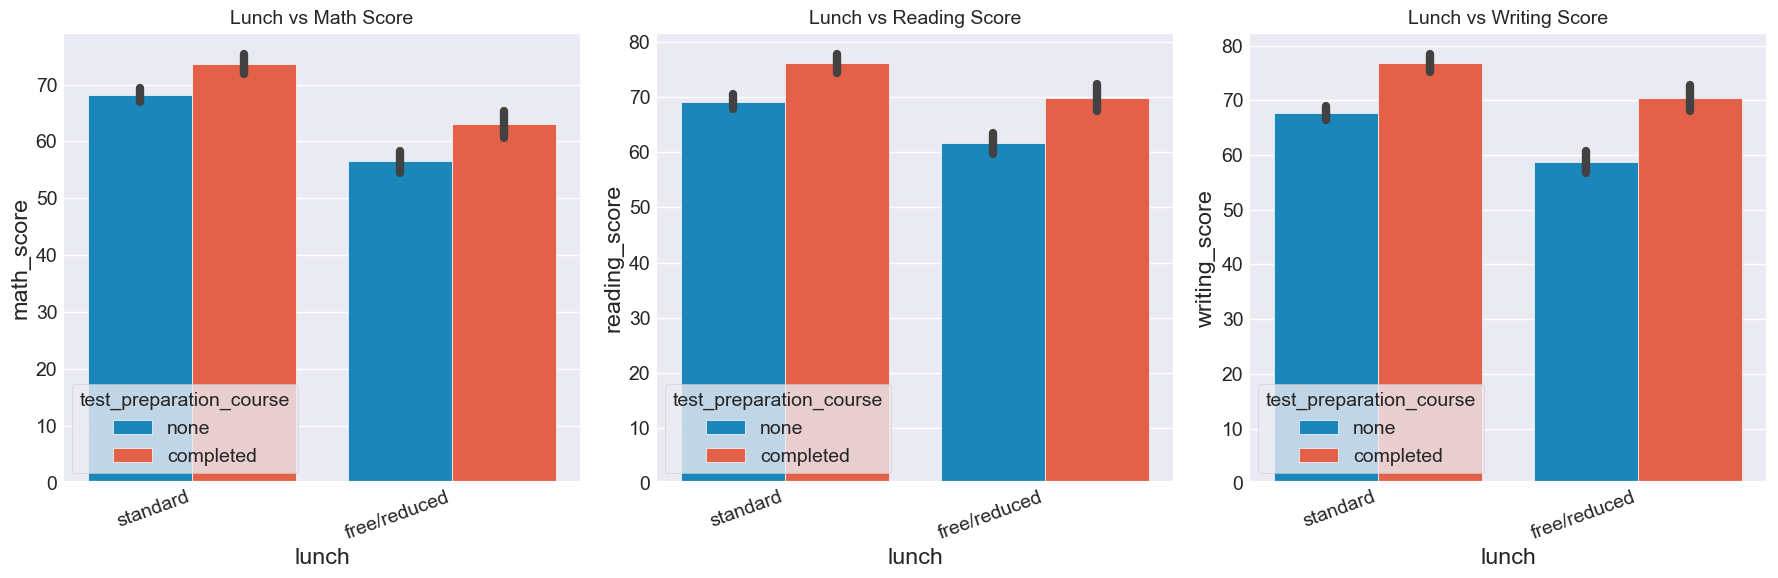

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=axes[0])
axes[0].set_title('Lunch vs Math Score', fontsize=14)

# Reading Score
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=axes[1])
axes[1].set_title('Lunch vs Reading Score', fontsize=14)

# Writing Score
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=axes[2])
axes[2].set_title('Lunch vs Writing Score', fontsize=14)

# Rotate x-tick labels for readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


4.4.6 CHECKING OUTLIERS

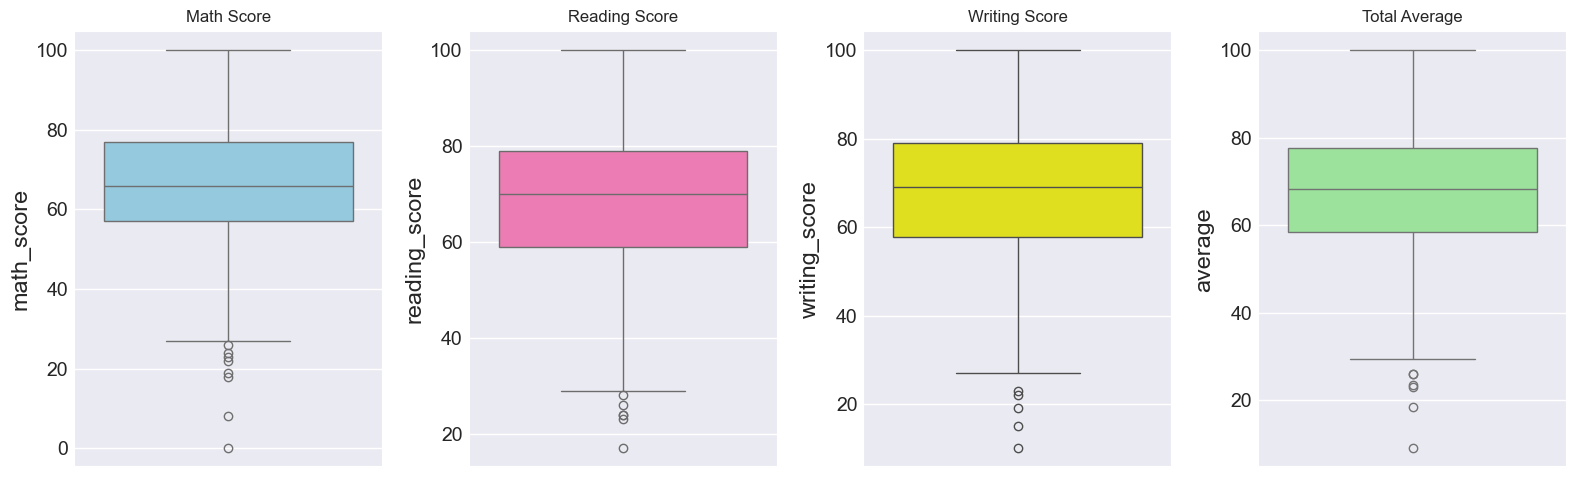

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Math Score
sns.boxplot(y='math_score', data=df, ax=axes[0], color='skyblue')
axes[0].set_title("Math Score", fontsize=12)

# Reading Score
sns.boxplot(y='reading_score', data=df, ax=axes[1], color='hotpink')
axes[1].set_title("Reading Score", fontsize=12)

# Writing Score
sns.boxplot(y='writing_score', data=df, ax=axes[2], color='yellow')
axes[2].set_title("Writing Score", fontsize=12)

# Average Score
sns.boxplot(y='average', data=df, ax=axes[3], color='lightgreen')
axes[3].set_title("Total Average", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

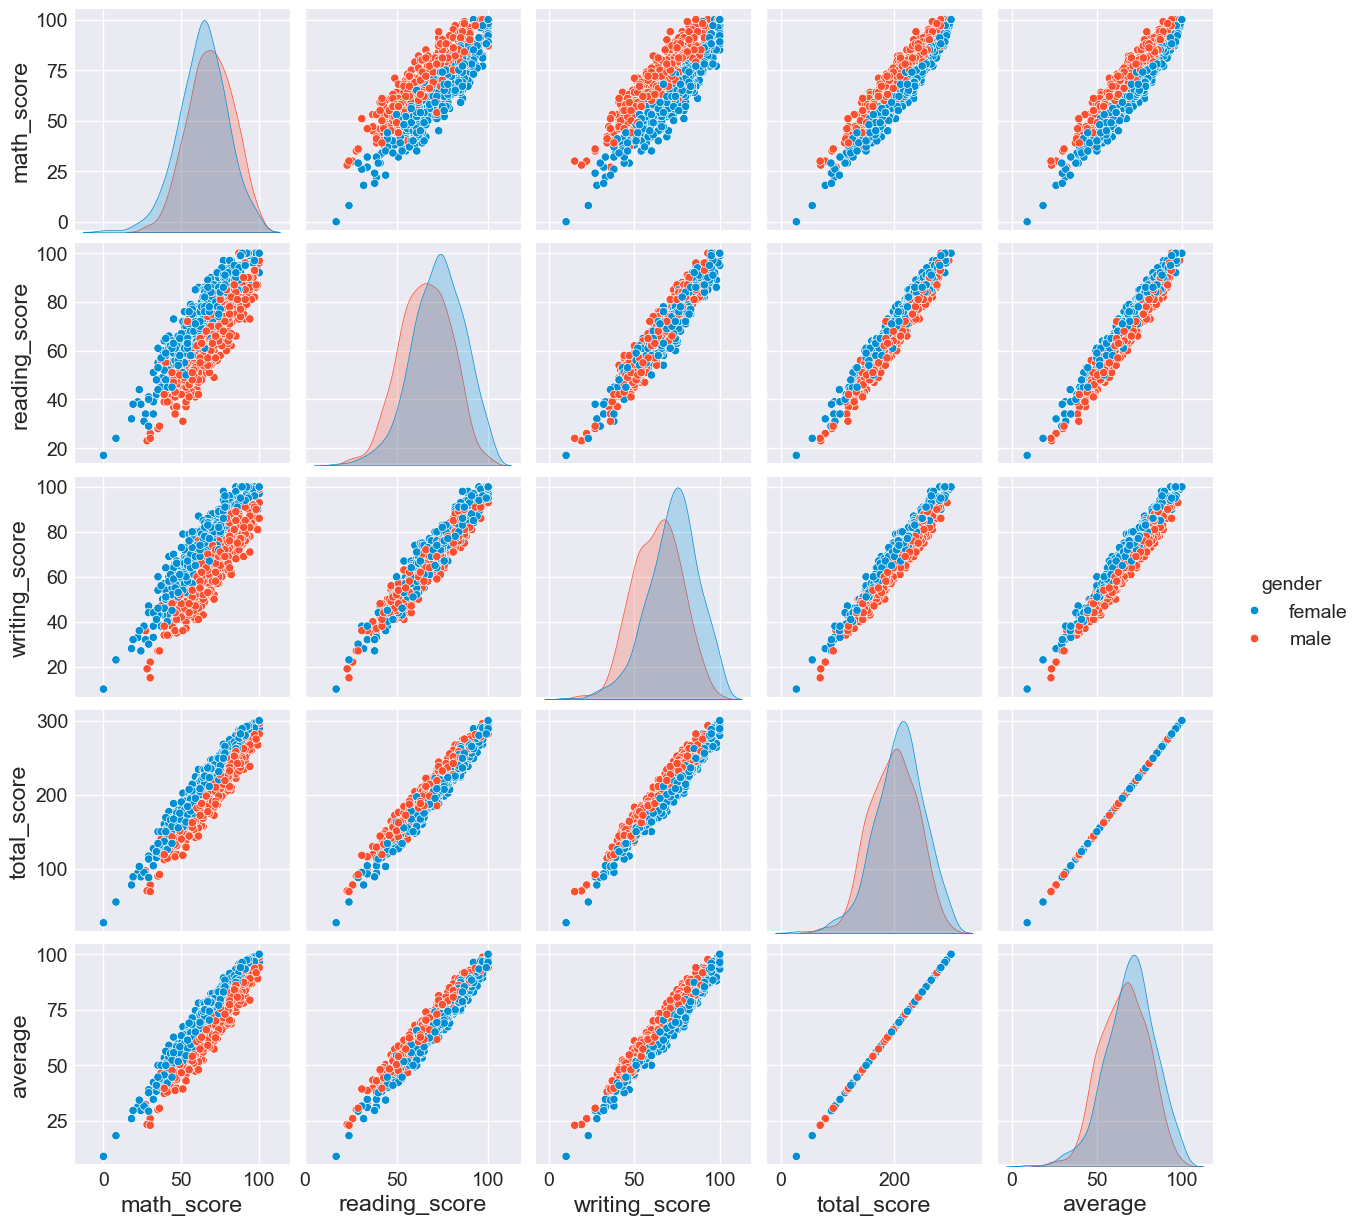

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.


5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial